### <caenter> Подготовительная часть для выполнения практического задания

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

X = np.array(
    [
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]
    ]
)

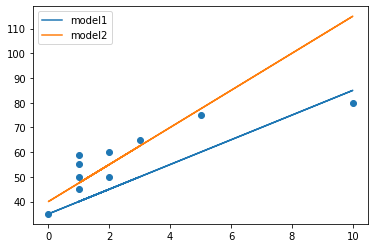

In [3]:
plt.scatter(X[1], y)
plt.plot(X[1], 35 * X[0] + X[1] * 5, label='model1')
plt.plot(X[1], 40 * X[0] + X[1] * 7.5, label='model2')
plt.legend(loc='best')
plt.show()

In [4]:
y_pred1 = np.ones(10) * 35 + X[1] * 5
y_pred2 = np.ones(10) * 40 + X[1] * 7.5

In [5]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [6]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

$\displaystyle MAE = \frac{1}{l} \sum_{i=1}^{l}|y_{i}-\hat{y_i}|$  
$\displaystyle MSE = \frac{1}{l} \sum_{i=1}^{l}(y_{i}-\hat{y_i})^2$

In [7]:
mae_1 = np.mean(np.abs(y_pred1 - y))
mae_2 = np.mean(np.abs(y_pred2 - y))

In [8]:
mae_1, mae_2

(10.4, 7.9)

In [9]:
mse_1 = np.mean((y_pred1 - y) ** 2)
mse_2 = np.mean((y_pred2 - y) ** 2)

In [10]:
mse_1, mse_2

(143.6, 151.35)

$MAE_1>MAE_2$ но $MSE_1<MSE_2$
Выбор метрики:
 * $MSE$ - в случае, если есть выбросы, и они имеют значение при работе модели
 * $MAE$ - в случае, если выбросы не важны, модель должна хорошо работать на большинстве моделей

Аналитический метод нахождения вектора весов в модели линейной регрессии:
$w=(X^{T}\cdot X)^{-1}\cdot X^{T}\cdot Y$

Реализация:

In [11]:
W_0 = np.linalg.inv(X @ X.T) @ X @ y
W_0
# отличается от классического вида, поскольку у нас изначально массив
# Х представляет собой транспонированную матрицу
# для приведения к классическому виду необходимо изначально
# задавать вектор признаков и вектор значений в иной размерности
# код ниже

array([47.23214286,  3.91071429])

In [12]:
X1 = X.swapaxes(0, 1)
y1 = y.reshape((len(y), -1))
W1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y1
W1

array([[47.23214286],
       [ 3.91071429]])

In [13]:
# ковариационная матрица
np.dot(X, X.T)
#np.dot(X1.T,X1)

array([[ 10,  26],
       [ 26, 146]])

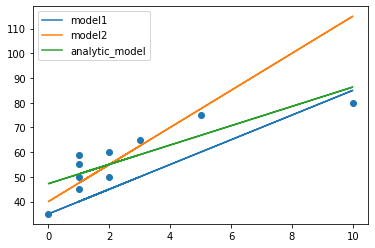

In [14]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='model1')
plt.plot(X[1], 40 * np.ones(10) + X[1] * 7.5, label='model2')
plt.plot(X[1], W_0[0] + W_0[1] * X[1], label='analytic_model')
plt.legend(loc='best')
plt.show()

In [15]:
y_pred3 = W_0[0] + W_0[1] * X[1]

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [18]:
calc_mae(y, y_pred1), calc_mae(y, y_pred2), calc_mae(y, y_pred3)

(10.4, 7.9, 6.182142857142859)

In [19]:
calc_mse(y, y_pred1), calc_mse(y, y_pred2), calc_mse(y, y_pred3)


(143.6, 151.35, 45.93750000000002)

Аналитическая формула имеет недостатки использования при вычислении весов линейной
модели в следствии того, что вычисление обратной матрицы при большом количестве признаков
имеет высокую вычислительную сложность.

## <center> Практическое задание

**1. Подберите скорость обучения($\alpha$) и количество итераций:**

In [20]:
n = X.shape[1]
alpha = 5e-02

W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.05)

In [21]:
last_err = False
for i in range(1000):
    y_pred = W @ X
    last_err = err if last_err else calc_mse(y, y_pred) * 2
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 10 == 0:
        print(i, W, err)
        if last_err/err < 1.0000001:
            break

0 [ 6.51 17.5 ] 3173.15
10 [22.7217522   8.44369395] 405.35103861095797
20 [32.8605174   6.56455282] 169.49199958291322
30 [38.80578987  5.46670483] 88.41177713894379
40 [42.29161487  4.82302057] 60.53886396989223
50 [44.33541912  4.44561648] 50.957004607078744
60 [45.53373968  4.22433742] 47.66305293823486
70 [46.23633738  4.09459738] 46.5306925908489
80 [46.64828353  4.01852838] 46.141421561628825
90 [46.88981524  3.9739277 ] 46.007602027467385
100 [47.03142979  3.94777749] 45.96159894380851
110 [47.11446104  3.93244513] 45.94578448354018
120 [47.16314381  3.92345549] 45.94034795334072
130 [47.19168743  3.91818469] 45.93847903969409
140 [47.20842308  3.91509432] 45.937836564054216
150 [47.21823551  3.91328238] 45.93761570048006
160 [47.22398872  3.91222001] 45.93753977430424


**2\*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:**

In [23]:
n = X.shape[1]
alpha = 5e-02

W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.05)

In [24]:
for i in range(170):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  # for ii in range(W.shape[0]):
  #   W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
  # здесь была ошибка:
  # W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
  W -= alpha * (1 / n * 2 * X @ (y_pred - y))
  if i % 10 == 0:
    print(i, W, err)

0 [ 6.51 17.5 ] 3173.15
10 [22.7217522   8.44369395] 405.3510386109581
20 [32.8605174   6.56455282] 169.49199958291322
30 [38.80578987  5.46670483] 88.41177713894379
40 [42.29161487  4.82302057] 60.53886396989223
50 [44.33541912  4.44561648] 50.957004607078744
60 [45.53373968  4.22433742] 47.66305293823486
70 [46.23633738  4.09459738] 46.5306925908489
80 [46.64828353  4.01852838] 46.141421561628825
90 [46.88981524  3.9739277 ] 46.007602027467385
100 [47.03142979  3.94777749] 45.96159894380851
110 [47.11446104  3.93244513] 45.94578448354016
120 [47.16314381  3.92345549] 45.94034795334072
130 [47.19168743  3.91818469] 45.93847903969409
140 [47.20842308  3.91509432] 45.93783656405422
150 [47.21823551  3.91328238] 45.93761570048006
160 [47.22398872  3.91222001] 45.93753977430424
